In [3]:
import geopandas as gpd
df2 = gpd.read_file('data/turkey_districts_1.geojson')
df2.rename(columns = {'adm1_en':'Region'}, inplace = True)
df2

,adm1_tr,Region,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((36.31587 38.36376, 36.31769 38..."
1,ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((39.25297 38.18188, 39.25334 38..."
2,AFYONKARAHİSAR,AFYONKARAHISAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((31.14797 39.26246, 31.15825 39..."
3,AĞRI,AGRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((43.28706 40.01281, 43.29129 40..."
4,AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((33.96446 39.03804, 33.96453 39..."
...,...,...,...,...,...,...,...,...,...
76,UŞAK,USAK,TUR064,3.864988,0.574221,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((29.74957 38.92497, 29.75259 38..."
77,VAN,VAN,TUR065,8.362708,2.159743,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((43.86293 39.35519, 43.86625 39..."
78,YALOVA,YALOVA,TUR077,2.051652,0.087016,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((29.53290 40.74757, 29.53292 40..."
79,YOZGAT,YOZGAT,TUR066,6.386410,1.436743,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((35.38648 40.24666, 35.38896 40..."


In [4]:
import matplotlib.pyplot as plt

## Distribution of Initial Syrian Refugee Population in Turkey
### Simulation started with initial population of 72807 
### Population concentrated around Istanbul and Syrian border

<AxesSubplot:>

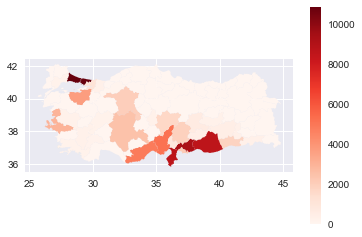

In [5]:
import pandas as pd
df_initPop1 = pd.read_csv('data/InitPop.50.csv')
df_merge_initPop  = df2.merge(df_initPop1, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df_merge_initPop.plot(ax=ax, column='InitPop',cmap='Reds', legend=True)

## Distribution of Syrian Refugees in Turkey after 10 days
### Refugees moved towards the north, north-west, east and south of the country.
### Most refugees moved towards regions in the south near the Syrian border

<AxesSubplot:>

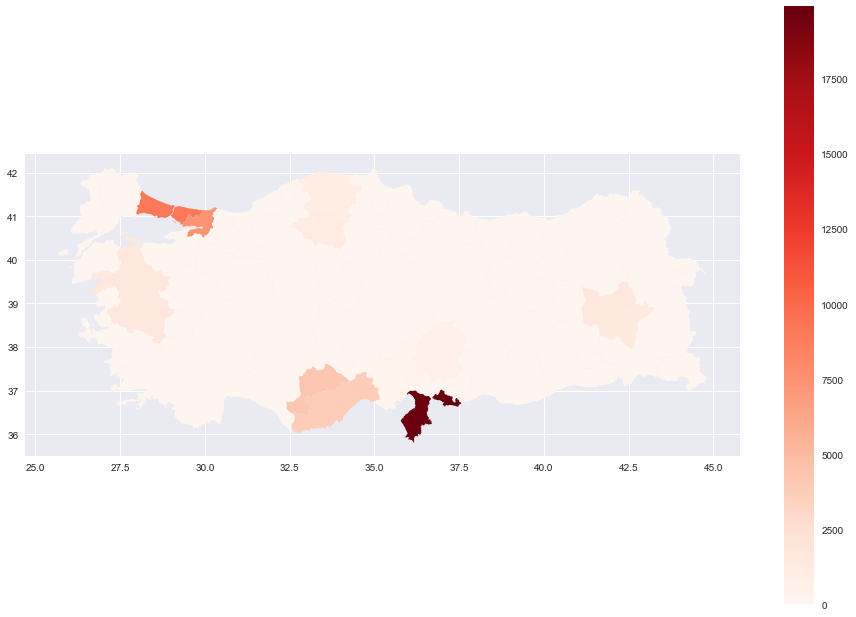

In [6]:
df_refPop = pd.read_csv('data/RefPop10.50.csv')
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)

## Distribution of Syrian Refugees in Turkey after 30 days

<AxesSubplot:>

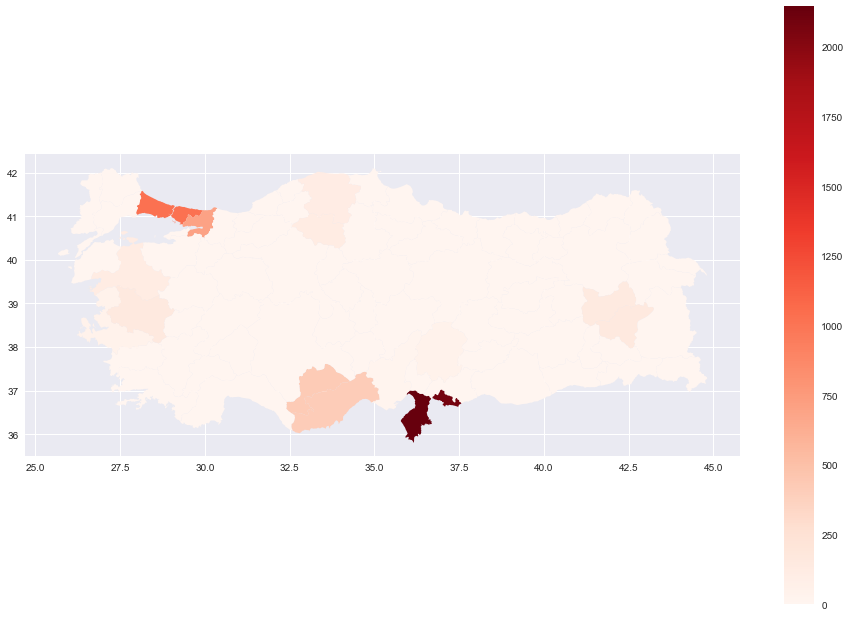

In [7]:
df_refPop = pd.read_csv('data/RefPop30.csv')
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)

In [8]:
df_routes = pd.read_csv('data/Routes10.50.csv')
df_routes = df_routes[df_routes.Number > 0]
top_20_routes = df_routes.nlargest(20, 'Number').reset_index()
top_20_routes

,index,Origin,Destination,Number
0,42,ISTANBUL,KOCAELI,4857
1,37,GAZIANTEP,KILIS,4669
2,38,GAZIANTEP,HATAY,4661
3,85,SANLIURFA,KILIS,4464
4,39,HATAY,KILIS,4341
5,86,SANLIURFA,HATAY,3920
6,0,ADANA,HATAY,2592
7,67,MERSIN,KARAMAN,2542
8,1,ADANA,KILIS,2328
9,24,BURSA,ISTANBUL,2024


## Top 20 most routes of refugee flow in Turkey after 10 days
### A route consists of the origin location at the begining of the simulation and the location at the end of the simulation

### The green dot represents the origin location, the red dot represents the destiny location

C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2.loc[

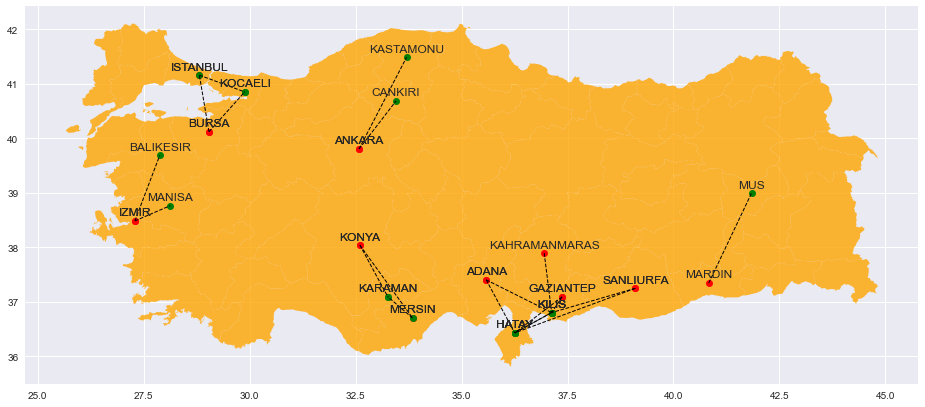

In [9]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")


In [10]:
df_routes = pd.read_csv('data/Routes30.csv')
df_routes = df_routes[df_routes.Number > 0]
top_20_routes = df_routes.nlargest(20, 'Number').reset_index()
top_20_routes

,index,Origin,Destination,Number
0,31,GAZIANTEP,KILIS,496
1,30,GAZIANTEP,HATAY,486
2,32,HATAY,KILIS,468
3,66,SANLIURFA,KILIS,445
4,65,SANLIURFA,HATAY,441
5,34,ISTANBUL,KOCAELI,439
6,0,ADANA,HATAY,256
7,53,MERSIN,KARAMAN,244
8,1,ADANA,KILIS,236
9,20,BURSA,ISTANBUL,218


### Top 20 most routes of refugee flow in Turkey after 30 days
### A route consists of the origin location at the begining of the simulation and the location at the end of the simulation

### The green dot represents the origin location, the red dot represents the destiny location

C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_13784\835829298.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2.loc[

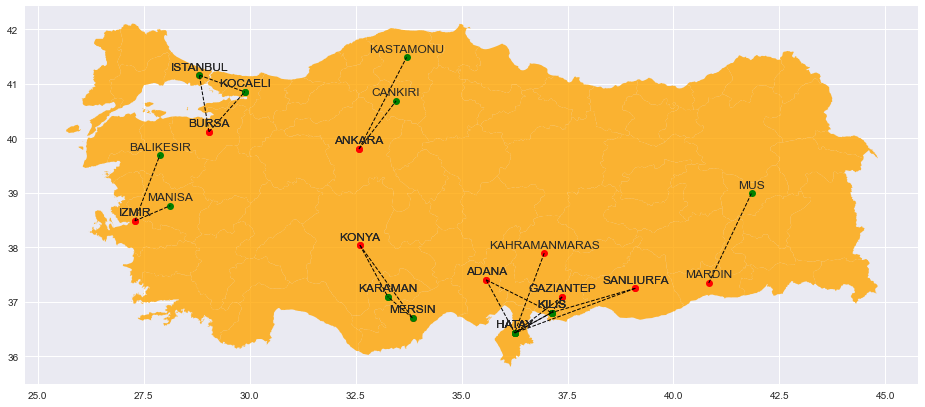

In [13]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")


Traceback (most recent call last):
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\Scripts\pipreqsnb.exe\__main__.py", line 7, in <module>
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\lib\site-packages\pipreqsnb\pipreqsnb.py", line 120, in main
    nb = json.load(open(nb_file, 'r', **open_file_args))
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "C:\Users\vivia\AppData\Local\Programs\Python\Python39\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 9008